In [3]:
#Importing required Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading and showing dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INSAID ML Intern project/Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Checking Null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Checking duplicate values
df.duplicated().sum()

0

In [7]:
#Statistical Analysis of Numeric columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Detect outliers using z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = np.where(z_scores > 3)
print("Outliers:", outliers)

Outliers: (array([      2,       3,      84, ..., 6362618, 6362619, 6362619]), array([6, 6, 5, ..., 6, 0, 6]))


In [9]:
# Flatten the array of outlier indices
outlier_indices = outliers[0]

In [10]:
# Remove rows containing outliers
cleaned_df = df.drop(outlier_indices)

In [11]:
cleaned_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6020098 entries, 0 to 6295999
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 551.2+ MB


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'step'),
  Text(1, 0, 'amount'),
  Text(2, 0, 'oldbalanceOrg'),
  Text(3, 0, 'newbalanceOrig'),
  Text(4, 0, 'oldbalanceDest'),
  Text(5, 0, 'newbalanceDest'),
  Text(6, 0, 'isFraud'),
  Text(7, 0, 'isFlaggedFraud')])

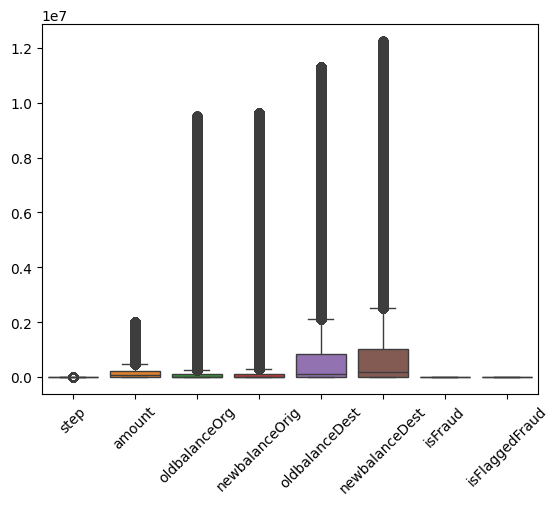

In [13]:
sns.boxplot(cleaned_df)
plt.xticks(rotation=45)

In [14]:
# Values count of isFraud Column

count_df = df['isFraud'].value_counts()
print(f"Values count of isFraud Orignal Column :{count_df}")

count_cleaned_df = cleaned_df['isFraud'].value_counts()
print(f"Values count of isFraud Column after removing outliers :{count_cleaned_df}")



print("0 => Is a Fraud\n1 => Is Not a Fraud")

Values count of isFraud Orignal Column :0    6354407
1       8213
Name: isFraud, dtype: int64
Values count of isFraud Column after removing outliers :0    6020098
Name: isFraud, dtype: int64
0 => Is a Fraud
1 => Is Not a Fraud


## For ML Model, we are using the orignal dataset(df) as the cleaned dataset (cleaned_df) doen't have both classes in inFraud column.

In [15]:
# Compute the correlation matrix
correlation_matrix = df.corr()

<ipython-input-15-8f2a423727d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


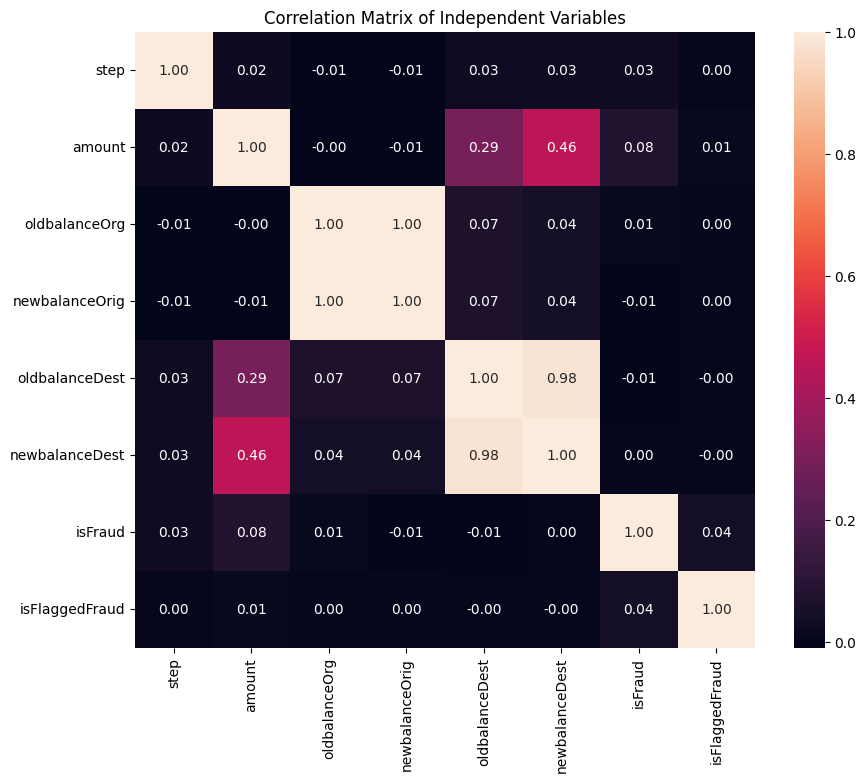

In [16]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Independent Variables")
plt.show()

In [17]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [18]:
print(df['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [19]:
# Define the mapping from categorical values to integer values
mapping = {'PAYMENT': 0, 'DEBIT': 1, 'CASH_OUT': 2, 'TRANSFER': 3, 'CASH_IN': 4}

In [20]:
# Replace the categorical values with integer values
df['type'] = df['type'].replace(mapping)

In [21]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
#separating data and labels, and(newbalanceOrg,oldbalanceDest) have positive corelation with other columns, we can remove them to save time.
X = df.select_dtypes(include=np.number).drop(columns=['isFlaggedFraud','isFraud'], axis=1)
y = df['isFraud']

In [23]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,9839.64,170136.0,160296.36,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0
2,1,3,181.00,181.0,0.00,0.0,0.0
3,1,2,181.00,181.0,0.00,21182.0,0.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0


In [24]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Define a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
  }

In [28]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')

Logistic Regression: Accuracy = 1.00
Decision Tree: Accuracy = 1.00
Random Forest: Accuracy = 1.00


Key Fcatores that predict Fraudulent are : step, type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest.

Yes these factor makes sense, as the are the independant factors. but some of them are heighly coorelated so we have to choose out of them to use.
like oldbalanceDest and newbalanceDest are positive coorelated so instead of using both factors we can use only one of them

we have ask them copy of their bank account pass book and income slips.

They will surely help to analyise their bank account history